In [9]:
import sys
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

The pizza_steak_sushi is a pre-formatted subset of the Food101 dataset, containing 1000 images of 101 different kinds of foods.

The images are in stardand image classification format, meaning that all the images from a specific class are in the same directory with that name.

We now want to trasform this raw data into a database usable with PyTorch, let's inspect our data.

In [10]:
import os
from pathlib import Path

venv_dir = Path(sys.prefix)
project_root = venv_dir.parent
image_path = project_root/"data/pizza_steak_sushi"


def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi'.
There are 3 directories and 0 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in '/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19

In [11]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/train'),
 PosixPath('/home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/test'))

Now we need to transform our raw data into a dataloader, this means transforming every image into a tensor, then into a database and finally into a dataloader.

The module torchvision.transforms is useful for formatting and manipulating images for data augmentation. We will compile this three steps:
1) Resize the images from 512x512 to 64x64
2) Randomly flip the images on the horizontal
3) Turn the images from a PIL image to a PyTorch tensor

In [12]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Train data is also augmented, this is the process of artifically increase the diversity of the training set. This results in better generalization by the model
# Other examples of more effective transforms are RandAugment and TrivialAugmentWide
# TrivialAugment is particularly interesting because it only applies a single random augmentation and somehow performs really well for basically free
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform,
    target_transform=None    # Can perform transformation on targets if needed
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform
)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=1,
    num_workers=1,   # How many subprocesses are used for data loading
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=1,
    num_workers=1,
    shuffle=False
)

class_names = train_data.classes
class_dict = train_data.class_to_idx

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: /home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: /home/glauco/Desktop/projects/learningPyTorch/data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


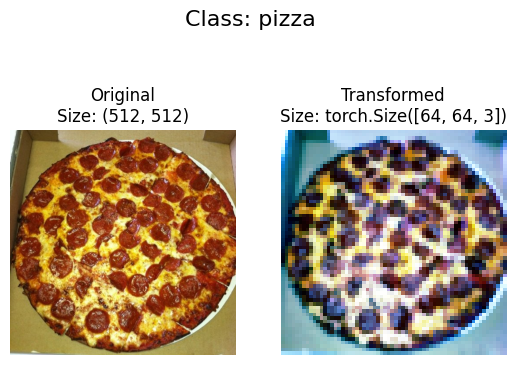

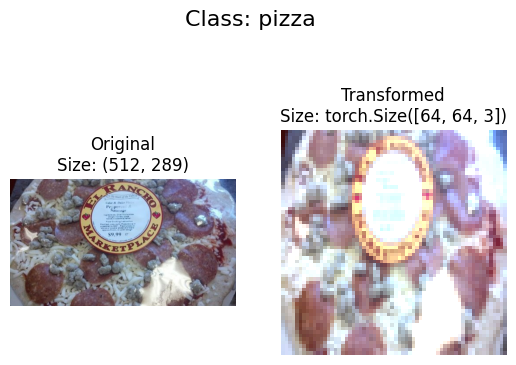

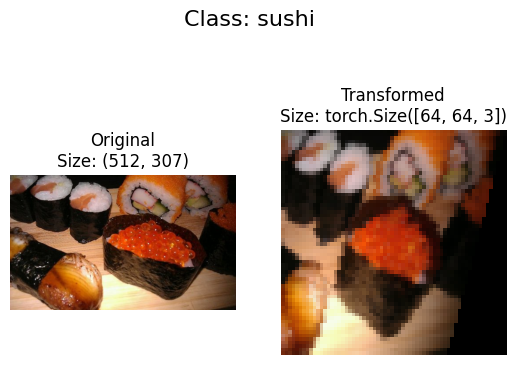

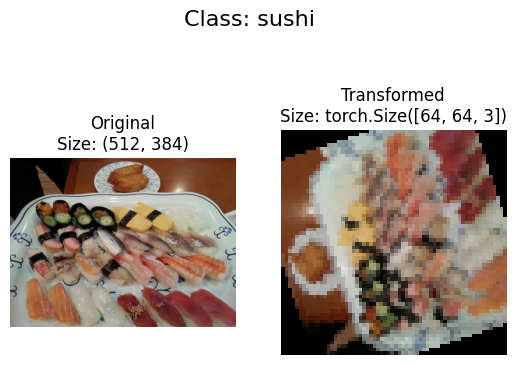

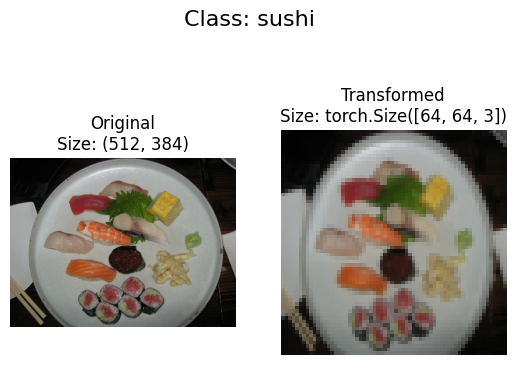

In [13]:
import random
from PIL import Image
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # PyTorch default is [C, H, W], but matplotlib wants [H, W, C]
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=5
)